In [140]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import (confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, 
                            recall_score, f1_score, accuracy_score, roc_auc_score, balanced_accuracy_score, precision_recall_fscore_support)

## Read Data Set

In [105]:
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')

## Preparation data

In [106]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [107]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [108]:
#Membuang kolom Unnamed dan tanggal 
df_train.drop(['Unnamed: 0'], axis=1, inplace=True)
df_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [109]:
#Melihat tampilan kolom df_train yang baru
df_train.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [110]:
#Melihat tampilan kolom df_test yang baru
df_test.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [111]:
#Mengecek data kosong 
df_train.isnull().mean()*100

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

*tidak ada data kosong pada data df_train*

In [112]:
df_test.isnull().mean()*100

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

*tidak ada data kosong pada data df_test*

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [115]:
df_train['datetime'] = pd.to_datetime(df_train['unix_time'], unit='s')
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['dob'] = pd.to_datetime(df_train['dob'])

df_train['datetime'].unique()

<DatetimeArray>
['2012-01-01 00:00:18', '2012-01-01 00:00:44', '2012-01-01 00:00:51',
 '2012-01-01 00:01:16', '2012-01-01 00:03:06', '2012-01-01 00:04:08',
 '2012-01-01 00:04:42', '2012-01-01 00:05:08', '2012-01-01 00:05:18',
 '2012-01-01 00:06:01',
 ...
 '2013-06-21 12:08:42', '2013-06-21 12:09:22', '2013-06-21 12:10:56',
 '2013-06-21 12:11:23', '2013-06-21 12:11:36', '2013-06-21 12:12:08',
 '2013-06-21 12:12:19', '2013-06-21 12:12:32', '2013-06-21 12:13:36',
 '2013-06-21 12:13:37']
Length: 1274823, dtype: datetime64[ns]

In [116]:
#Check Unique value dari tipe data categprical
print(f'total data {df_train.shape[0]}')
for x in df_train.select_dtypes(include='O').columns:
    print(f'---{x}----')
    print(f'jumlah Unique {df_train[x].nunique()}')
    print()

total data 1296675
---merchant----
jumlah Unique 693

---category----
jumlah Unique 14

---first----
jumlah Unique 352

---last----
jumlah Unique 481

---gender----
jumlah Unique 2

---street----
jumlah Unique 983

---city----
jumlah Unique 894

---state----
jumlah Unique 51

---job----
jumlah Unique 494

---trans_num----
jumlah Unique 1296675



*total data yang dimiliki yaitu 1296675, pada pemeriksaan data jumlah merchant sebanyak 693*

In [117]:
df_train['trnsaction_hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['transaction_day_of_week'] = df_train['trans_date_trans_time'].dt.dayofweek
df_train['transaction_day'] = df_train['trans_date_trans_time'].dt.day

df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,datetime,trnsaction_hour,transaction_day_of_week,transaction_day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2012-01-01 00:00:18,0,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2012-01-01 00:00:44,0,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2012-01-01 00:00:51,0,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2012-01-01 00:01:16,0,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2012-01-01 00:03:06,0,1,1


In [118]:
value = df_train['job'].value_counts().reset_index()

value['kategorisasi'] = ['other' if x <8270 else x for x in value['count']]
value.head(20)

,job,count,kategorisasi
0,Film/video editor,9779,9779
1,Exhibition designer,9199,9199
2,Naval architect,8684,8684
3,"Surveyor, land/geomatics",8680,8680
4,Materials engineer,8270,8270
5,"Designer, ceramics/pottery",8225,other
6,Systems developer,7700,other
7,IT trainer,7679,other
8,Financial adviser,7659,other
9,Environmental consultant,7547,other


<Axes: title={'center': 'Fraud Transaction in Hour'}, xlabel='trnsaction_hour'>

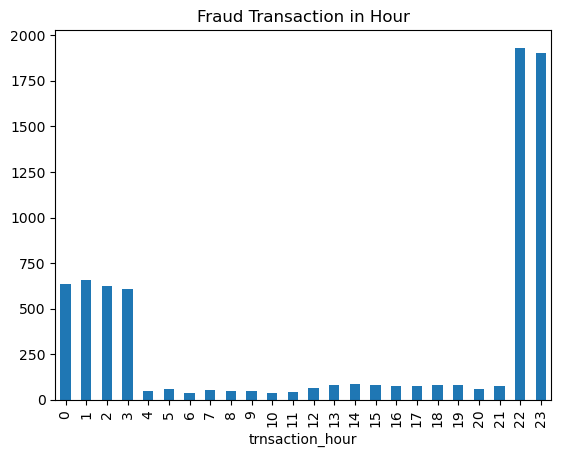

In [119]:
df_train[(df_train['is_fraud']==1)]['trnsaction_hour'].value_counts().sort_index().plot(kind='bar', title="Fraud Transaction in Hour")


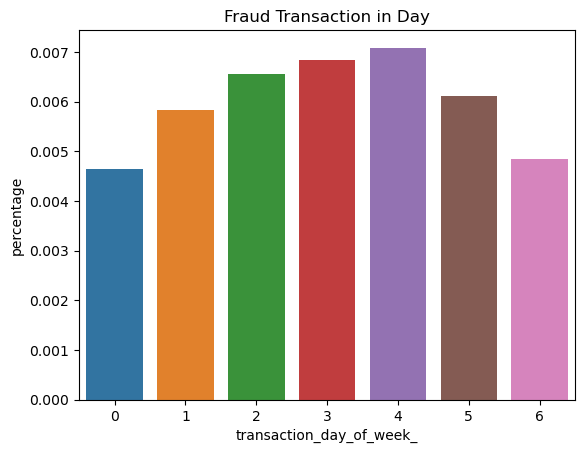

In [120]:
fraud_hour = df_train.groupby(['transaction_day_of_week'],as_index=False
).agg({
    'is_fraud':['count','sum']})

fraud_hour.columns = ['_'.join(x) for x in fraud_hour.columns]
fraud_hour['percentage'] = fraud_hour.is_fraud_sum/fraud_hour.is_fraud_count

plt.title('Fraud Transaction in Day')
sns.barplot(data=fraud_hour, y='percentage', x='transaction_day_of_week_', orient='v');

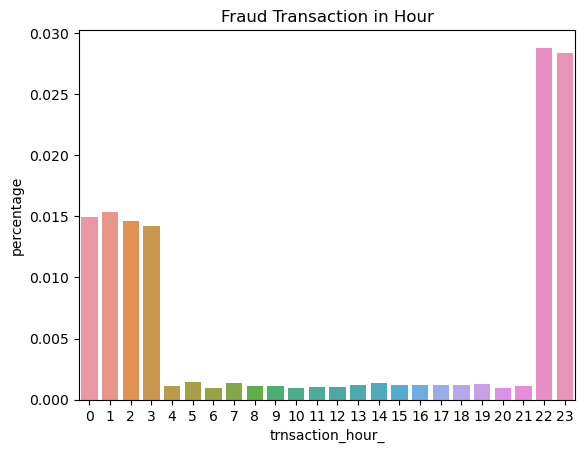

In [121]:
fraud_hour = df_train.groupby(
    ['trnsaction_hour'],as_index=False
).agg({
    "is_fraud":["count","sum"]
})

fraud_hour.columns = ['_'.join(x) for x in fraud_hour.columns]
fraud_hour["percentage"] = fraud_hour.is_fraud_sum/fraud_hour.is_fraud_count

plt.title("Fraud Transaction in Hour")
sns.barplot(data=fraud_hour, y="percentage", x="trnsaction_hour_",orient="v")

plt.show()

In [122]:
import math

In [123]:
#Menghitung jarak kejadian transaksi
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon2)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat/2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    radius = 6371

    distance = radius * c

    return distance

df_train["distance_sender_receiver"] = df_train.apply(lambda row:haversine_distance(row["lat"],row["long"],row["merch_lat"],row["merch_long"]),axis=1).round(2)
    

In [124]:
#Mendefiniskan variabel y dan variabel X
X_train = df_train.drop(['is_fraud'], axis=1)
y_train = df_train['is_fraud']

C:\Users\sahab\AppData\Local\Temp\ipykernel_9820\2611996194.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby(pd.qcut(df_train["distance_sender_receiver"], q=5))["is_fraud"].sum().plot(kind="bar")


<Axes: xlabel='distance_sender_receiver'>

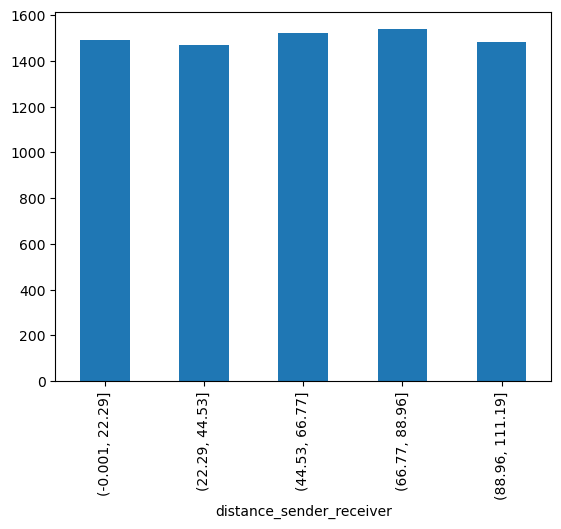

In [125]:
df_train.groupby(pd.qcut(df_train["distance_sender_receiver"], q=5))["is_fraud"].sum().plot(kind="bar")

C:\Users\sahab\AppData\Local\Temp\ipykernel_9820\1775578577.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby(pd.qcut(df_train["amt"], q=20))["is_fraud"].sum().plot(kind="bar")


<Axes: xlabel='amt'>

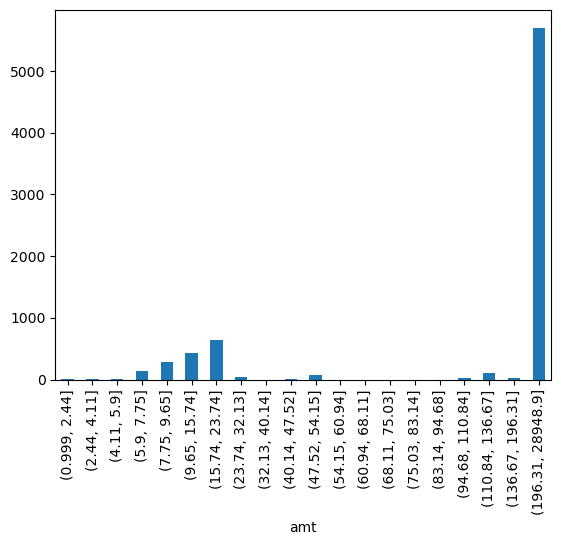

In [126]:
df_train.groupby(pd.qcut(df_train["amt"], q=20))["is_fraud"].sum().plot(kind="bar")

In [127]:
from datetime import datetime

df_train["Age"] = df_train["dob"].apply(lambda row : (datetime.now() - row).days/365.25)
df_train["Age"] = df_train["Age"].round(0)

C:\Users\sahab\AppData\Local\Temp\ipykernel_9820\1026896592.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby(pd.qcut(df_train["Age"], q=10))["is_fraud"].mean().plot(kind="bar")


<Axes: xlabel='Age'>

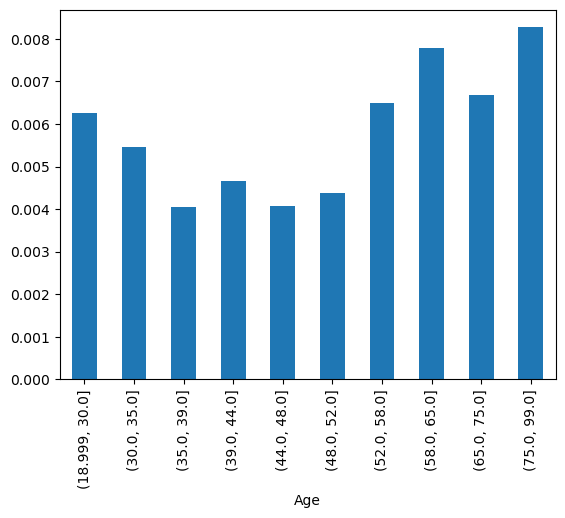

In [128]:
df_train.groupby(pd.qcut(df_train["Age"], q=10))["is_fraud"].mean().plot(kind="bar")

## Proporsi Target y

In [129]:
data_baru = ["amt", "distance_sender_receiver", "trnsaction_hour", "transaction_day_of_week", "city_pop", "Age"]

In [130]:
X = df_train[data_baru]
y = df_train[['is_fraud']]

In [131]:
# Melihat proporsi target (var y)
print(y.value_counts()/len(y))

is_fraud
0           0.994211
1           0.005789
Name: count, dtype: float64


In [132]:
# Menyimpan dengan nama proporsi
proporsi = y.value_counts()/len(y)

In [133]:
# Melihat proporsi
proporsi = proporsi*100
proporsi

is_fraud
0           99.421135
1            0.578865
Name: count, dtype: float64

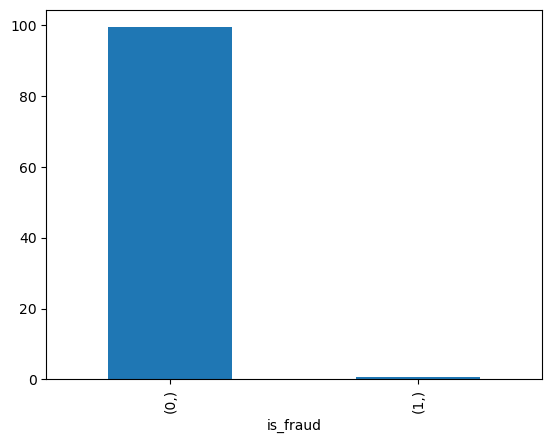

In [134]:
proporsi.plot.bar();

In [135]:
y = proporsi

In [136]:
y

is_fraud
0           99.421135
1            0.578865
Name: count, dtype: float64

##### *Perhatikan bahwa proporsinya sangat jauh antara kategori 1 (fraud) dengan 0 (no fraud), bisa dikatakan data imbalance extreme, Perlu adanya solusi sebelum proses modeling terjadi, terlebih modeling adaboost yang sangat terpengaruh hasilnya ketika data meiliki nilai outlier*

## Solusi Imbalance Data

In [167]:
# Mengimpor library imblearn untuk solusi data imbalance
from imblearn.over_sampling import RandomOverSampler

In [168]:
ros = RandomOverSampler(
    sampling_strategy= 'auto', # sampling untuk kategori minoritas
    random_state= 123,  # untuk replikasi
)  

# Fitting ke X dan y
X_train, y_train = ros.fit_resample(X, y)

In [163]:
# Proporsi target
print(y_train.value_counts()/len(y_train))

is_fraud
0           0.5
1           0.5
Name: count, dtype: float64


#### *Data sudah menjadi data yang balance data kategori 1 (fraud) dengan 0 (no fraud) sudah menjadi seimbang data (0) 0.5/50% dan data (1) 0.5/50%*

## Preprocessing

In [137]:
X = df_train[data_baru]
y = df_train[['is_fraud']]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.3,
    random_state=1)

In [169]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression(random_state=42))])
    
pipeline.fit(X_train, y_train)

C:\Users\sahab\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [170]:
#Melihat Korelasi Kolom
mat_korelasi = X_train.corr(method='pearson')
mat_korelasi

,amt,distance_sender_receiver,trnsaction_hour,transaction_day_of_week,city_pop,Age
amt,1.000000,0.004927,0.256310,0.013136,0.021190,0.067324
distance_sender_receiver,0.004927,1.000000,0.000192,-0.004130,-0.003931,0.002774
trnsaction_hour,0.256310,0.000192,1.000000,0.000084,-0.012850,0.010994
transaction_day_of_week,0.013136,-0.004130,0.000084,1.000000,0.011867,0.018271
city_pop,0.021190,-0.003931,-0.012850,0.011867,1.000000,-0.062662
Age,0.067324,0.002774,0.010994,0.018271,-0.062662,1.000000


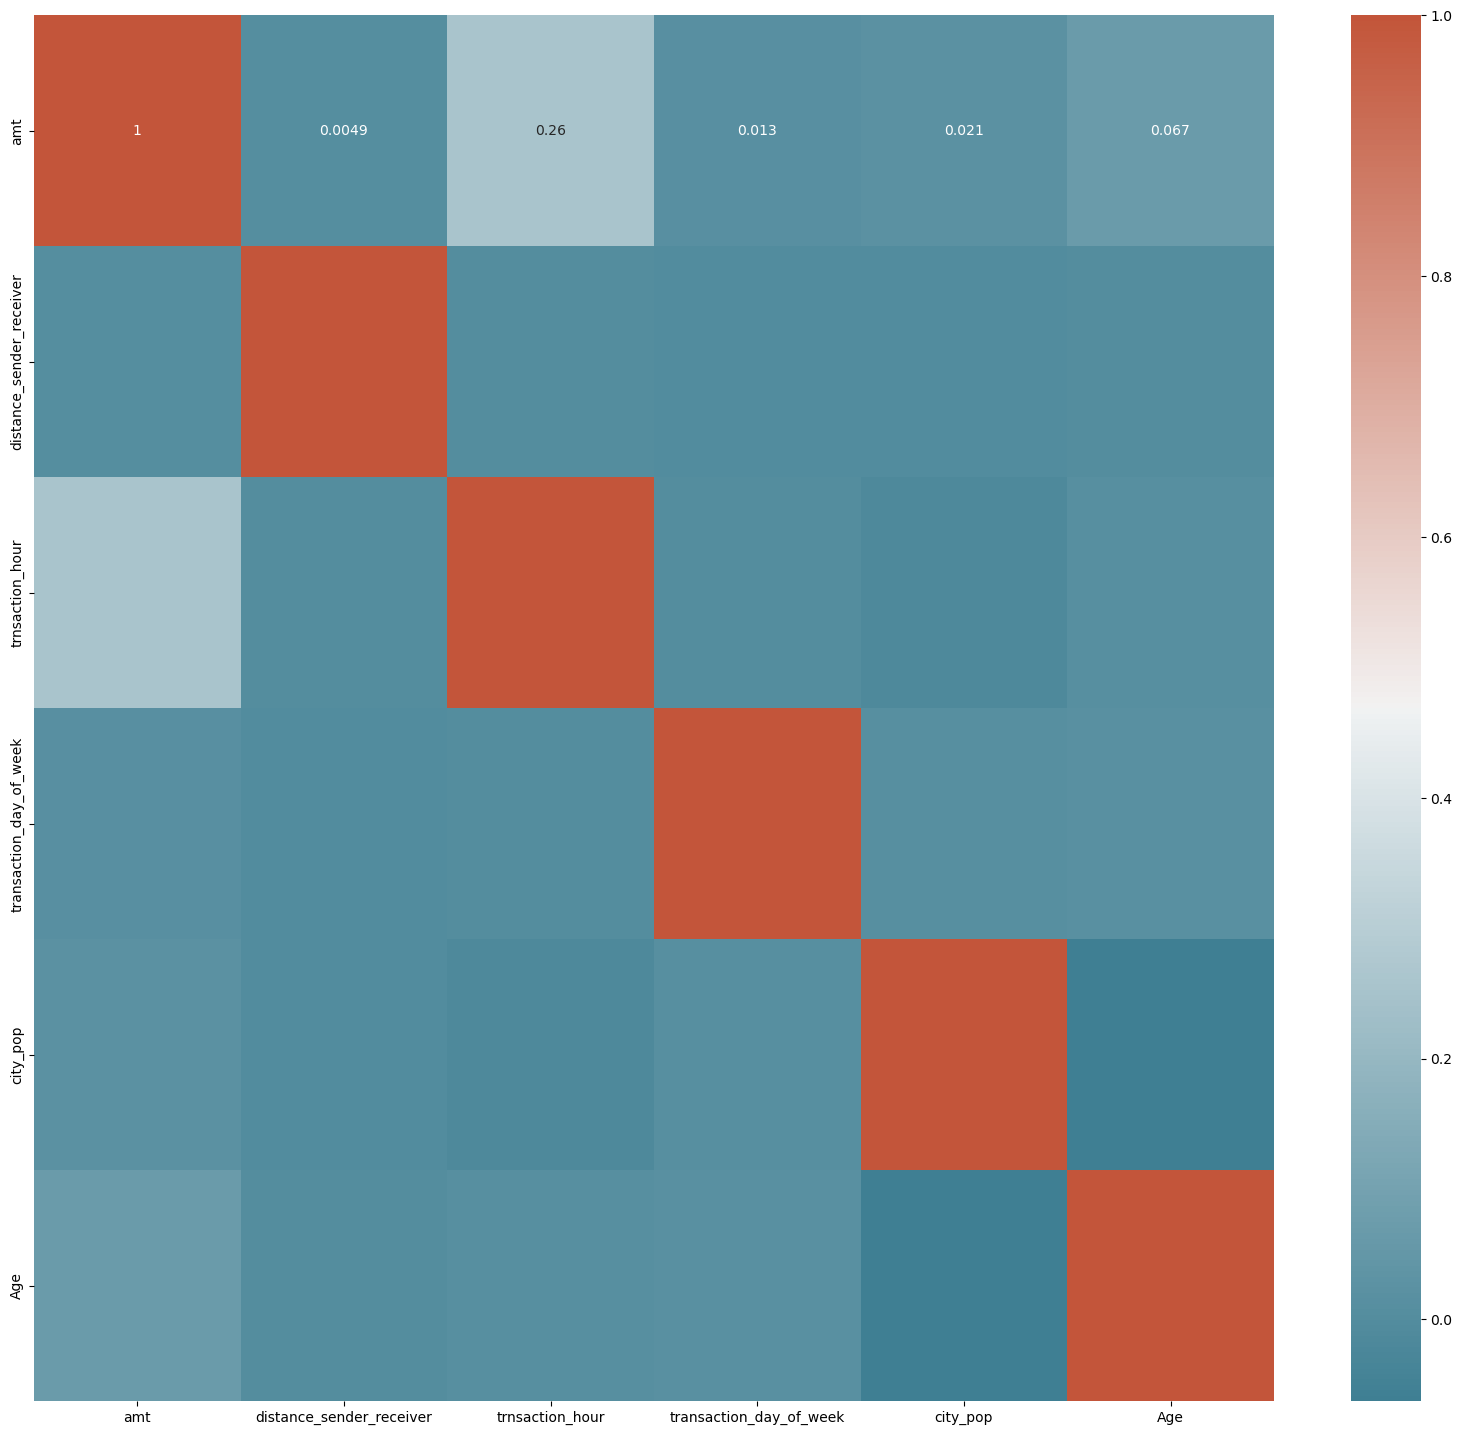

In [171]:
# Menyiapkan cmap untuk heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting
fig, ax = plt.subplots(figsize = (20,18))

# Plotting heatmap menggunakan seaborn
sns.heatmap(mat_korelasi, annot=True, cmap=cmap);